# Experimentation Boston House Prices - Aidan O'Connor - G00364756

## Contents

1.  Create Neural Network
2.  Experiment with different Pre-processing Scalers

In [189]:
# Loading Python packages.
import sklearn as sk
import pandas as pd
import numpy as np
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.linear_model import LinearRegression
from scipy.stats import median_test
%matplotlib inline

# Loading Boston House Prices Dataset from scikit-learn.
# Adapted from:- [2](References) https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston
boston = load_boston()

### Extracting the dataset from the dictionary

In [190]:
# Adapted from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
# Need to convert the dataset to a pandas dataframe to perform exploratory analysis

# Creating a dataframe from the boston house prices dictionary
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Appending the target "MEDV" to the dataframe, which represents the median house price in '000s.
df['PRICE'] = (pd.Series(boston.target))

In [191]:
# Determining what the acronyms stand form in relation to this dataset by printing DESCR attribute.
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Constructing the Neural Network Model

In [192]:
# Adapted from:- https://keras.io/#getting-started-30-seconds-to-keras
# and also from Dr. Ian McGloughlin's jupyter notebooks and lectures.

# Importing Keras
import keras as kr
from sklearn import preprocessing as prep
from sklearn import decomposition as dec

In [193]:
#Adapted from: https://medium.com/themlblog/multivariate-regression-using-deep-neural-networks-in-tensorflow-f94f42a148b3

# Set y to Price
y = df['PRICE']

# Set x to whole Boston House Prices Dataset minus the Price column
x = df.drop("PRICE",axis=1)

### Split dataset into training and test subsets

In [227]:
# Adapted from:- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Adapted from:-Using a validation set - https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set

# Use scikit learn to split the dataset into a training set and a test set
#x_train, x_test, y_train, y_test= mod.train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_val_and_test, y_train, y_val_and_test = mod.train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = mod.train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

### Create the Neural Network and set its parameters

In [228]:
# Adapted from:- https://keras.io/#getting-started-30-seconds-to-keras
# and also from Dr. Ian McGloughlin's jupyter notebooks and lectures.

# Create a neural network using keras
m = kr.models.Sequential()

# Add layers to of nurons to the network and add activation functions that are appropriate for the model
m.add(kr.layers.Dense(100, input_dim=13, activation="softplus"))
m.add(kr.layers.Dense(50, input_dim=13, activation="softplus"))
m.add(kr.layers.Dense(20, input_dim=13, activation="softplus"))
m.add(kr.layers.Dense(1, input_dim=13, activation="linear"))

# Compile the neural network using a suitable optimiser to imporve the model each time it is trained
m.compile(loss="mean_squared_logarithmic_error", optimizer="adam",  metrics=['accuracy'])

### Train the Neural Network

In [229]:
# Train the neural network.
boston_model = m.fit(x_train, y_train, epochs=100, batch_size=20, validation_data=(x_val,y_val))

Train on 354 samples, validate on 76 samples
Epoch 1/100
354/354 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.0056 - val_loss: 0.1331 - val_accuracy: 0.0132
Epoch 2/100
354/354 [==============================] - 0s 144us/step - loss: 0.1435 - accuracy: 0.0113 - val_loss: 0.0919 - val_accuracy: 0.0000e+00
Epoch 3/100
354/354 [==============================] - 0s 138us/step - loss: 0.1040 - accuracy: 0.0113 - val_loss: 0.0610 - val_accuracy: 0.0000e+00
Epoch 4/100
354/354 [==============================] - 0s 127us/step - loss: 0.1086 - accuracy: 0.0028 - val_loss: 0.0694 - val_accuracy: 0.0000e+00
Epoch 5/100
354/354 [==============================] - 0s 135us/step - loss: 0.1040 - accuracy: 0.0085 - val_loss: 0.0661 - val_accuracy: 0.0000e+00
Epoch 6/100
354/354 [==============================] - 0s 166us/step - loss: 0.1156 - accuracy: 0.0085 - val_loss: 0.0693 - val_accuracy: 0.0000e+00
Epoch 7/100
354/354 [==============================] - 0s 138us/ste

Epoch 56/100
354/354 [==============================] - 0s 124us/step - loss: 0.0467 - accuracy: 0.0085 - val_loss: 0.0403 - val_accuracy: 0.0132
Epoch 57/100
354/354 [==============================] - 0s 118us/step - loss: 0.0467 - accuracy: 0.0056 - val_loss: 0.0614 - val_accuracy: 0.0000e+00
Epoch 58/100
354/354 [==============================] - 0s 110us/step - loss: 0.0639 - accuracy: 0.0056 - val_loss: 0.0404 - val_accuracy: 0.0132
Epoch 59/100
354/354 [==============================] - 0s 116us/step - loss: 0.0472 - accuracy: 0.0169 - val_loss: 0.0390 - val_accuracy: 0.0132
Epoch 60/100
354/354 [==============================] - 0s 121us/step - loss: 0.0449 - accuracy: 0.0198 - val_loss: 0.0506 - val_accuracy: 0.0263
Epoch 61/100
354/354 [==============================] - 0s 118us/step - loss: 0.0421 - accuracy: 0.0056 - val_loss: 0.0435 - val_accuracy: 0.0132
Epoch 62/100
354/354 [==============================] - 0s 110us/step - loss: 0.0429 - accuracy: 0.0113 - val_loss: 0.04

### Use the Neural Network model to predict the values for the test subset and evaluate the model

In [230]:
# Run each x test value through the neural network. (Not using this currently but can print out the values of p_test if you want)
p_test = m.predict(x_test)
#p_test

# Evaluate the prediction - The first element is the loss, the second element is the accuracy
Eval = m.evaluate(x_test, y_test)
print("\nLoss is: ", Eval[0], "\nAccuracy is: ", Eval[1])

76/76 [==============================] - 0s 65us/step

Loss is:  0.03923933443270231 
Accuracy is:  0.01315789483487606


### Determining whether Overfitting is occuring and determing the accuracy of the model

#### Graphing the training loss vs the validation loss

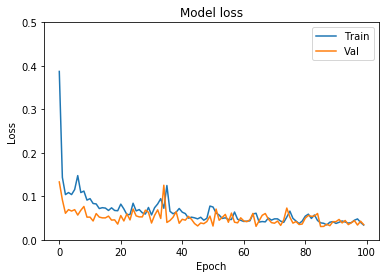

In [231]:
#Adapted from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

plt.plot(boston_model.history['loss'])
plt.plot(boston_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 0.5)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Accuracy of the model

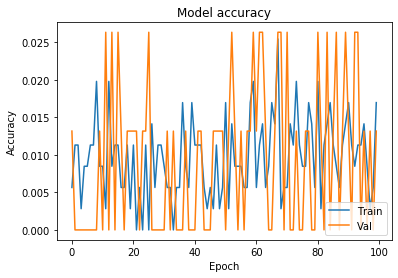

In [232]:
plt.plot(boston_model.history['accuracy'])
plt.plot(boston_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Trying to improve the Neural Network Model
### Scaling

In [233]:
# Adapted from https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

# Initiating the preprocessing scaler
scaler = prep.StandardScaler()
scaler.fit(x_train)

# Normalising the x train subset
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x.columns)

# Normalising the x test subset
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

# Normalising the x validation subset
x_val_scaled = pd.DataFrame(scaler.transform(x_val), columns=x.columns)

#### Fit the scaled data to the model

In [234]:
boston_model_scaled = m.fit(x_train_scaled, y_train, epochs=100, batch_size=20, validation_data=(x_val_scaled,y_val))

Train on 354 samples, validate on 76 samples
Epoch 1/100
354/354 [==============================] - 0s 144us/step - loss: 1.2532 - accuracy: 0.0028 - val_loss: 0.1712 - val_accuracy: 0.0000e+00
Epoch 2/100
354/354 [==============================] - 0s 127us/step - loss: 0.2126 - accuracy: 0.0056 - val_loss: 0.0777 - val_accuracy: 0.0000e+00
Epoch 3/100
354/354 [==============================] - 0s 116us/step - loss: 0.0711 - accuracy: 0.0028 - val_loss: 0.0520 - val_accuracy: 0.0132
Epoch 4/100
354/354 [==============================] - 0s 130us/step - loss: 0.0574 - accuracy: 0.0113 - val_loss: 0.0438 - val_accuracy: 0.0000e+00
Epoch 5/100
354/354 [==============================] - 0s 127us/step - loss: 0.0506 - accuracy: 0.0085 - val_loss: 0.0419 - val_accuracy: 0.0000e+00
Epoch 6/100
354/354 [==============================] - 0s 127us/step - loss: 0.0475 - accuracy: 0.0085 - val_loss: 0.0394 - val_accuracy: 0.0000e+00
Epoch 7/100
354/354 [==============================] - 0s 135us/s

354/354 [==============================] - 0s 147us/step - loss: 0.0251 - accuracy: 0.0113 - val_loss: 0.0268 - val_accuracy: 0.0132
Epoch 56/100
354/354 [==============================] - 0s 118us/step - loss: 0.0250 - accuracy: 0.0169 - val_loss: 0.0266 - val_accuracy: 0.0132
Epoch 57/100
354/354 [==============================] - 0s 113us/step - loss: 0.0249 - accuracy: 0.0141 - val_loss: 0.0272 - val_accuracy: 0.0132
Epoch 58/100
354/354 [==============================] - 0s 121us/step - loss: 0.0248 - accuracy: 0.0141 - val_loss: 0.0269 - val_accuracy: 0.0132
Epoch 59/100
354/354 [==============================] - 0s 118us/step - loss: 0.0248 - accuracy: 0.0141 - val_loss: 0.0267 - val_accuracy: 0.0132
Epoch 60/100
354/354 [==============================] - 0s 107us/step - loss: 0.0246 - accuracy: 0.0141 - val_loss: 0.0264 - val_accuracy: 0.0132
Epoch 61/100
354/354 [==============================] - 0s 116us/step - loss: 0.0246 - accuracy: 0.0141 - val_loss: 0.0265 - val_accuracy

#### Predict the y values for the x test subset using the scaled model

In [235]:
# Run each x_test_scaled value through the neural network. (Not using this currently but can print out the values of p_test_scaled if you want)
p_test_scaled = m.predict(x_test_scaled).round().T
#p_test_scaled

#### Evaluate the scaled Model

In [236]:
# Evaluate the prediction - The first element is the loss, the second element is the accuracy
Eval_scaled = m.evaluate(x_test_scaled, y_test)

# Print the Loss and Accuracy of the scaled model.
print("\nLoss is: ", Eval_scaled[0], "\nAccuracy is: ", Eval_scaled[1])

76/76 [==============================] - 0s 105us/step

Loss is:  0.025754812516664203 
Accuracy is:  0.05263157933950424


### Determining whether Overfitting is occuring and determing the accuracy of the model (Scaled model)

#### Graphing the training loss vs the validation loss

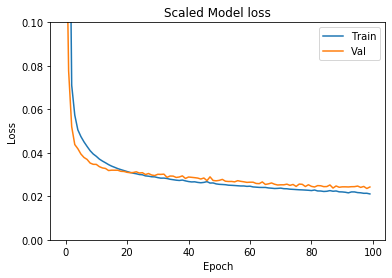

In [237]:
#Adapted from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

plt.plot(boston_model_scaled.history['loss'])
plt.plot(boston_model_scaled.history['val_loss'])
plt.title('Scaled Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Accuracy of the scaled model

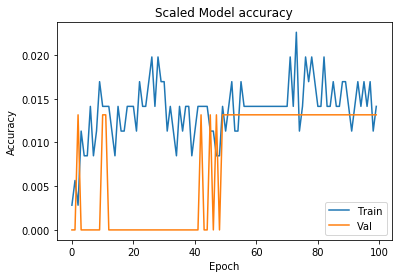

In [238]:
plt.plot(boston_model_scaled.history['accuracy'])
plt.plot(boston_model_scaled.history['val_accuracy'])
plt.title('Scaled Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Whitening the data

In [239]:
# Understanding PCA: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

# Initiating the PCA transform
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train_scaled)

# PCA of the the x train scaled subset
x_white_train = pd.DataFrame(pca.transform(x_train_scaled), columns=x.columns)

# PCA of the x test scaled subset
x_white_test = pd.DataFrame(pca.transform(x_test_scaled), columns=x.columns)

# PCA of the x validation scaled subset
x_white_val = pd.DataFrame(pca.transform(x_val_scaled), columns=x.columns)

#### Fit the whitened data to the model

In [240]:
boston_model_white = m.fit(x_white_train, y_train, epochs=100, batch_size=20, validation_data=(x_white_val,y_val))

Train on 354 samples, validate on 76 samples
Epoch 1/100
354/354 [==============================] - 0s 135us/step - loss: 0.1527 - accuracy: 0.0056 - val_loss: 0.0915 - val_accuracy: 0.0000e+00
Epoch 2/100
354/354 [==============================] - 0s 127us/step - loss: 0.1096 - accuracy: 0.0028 - val_loss: 0.0669 - val_accuracy: 0.0000e+00
Epoch 3/100
354/354 [==============================] - 0s 141us/step - loss: 0.0798 - accuracy: 0.0085 - val_loss: 0.0552 - val_accuracy: 0.0000e+00
Epoch 4/100
354/354 [==============================] - 0s 144us/step - loss: 0.0607 - accuracy: 0.0141 - val_loss: 0.0476 - val_accuracy: 0.0000e+00
Epoch 5/100
354/354 [==============================] - 0s 127us/step - loss: 0.0503 - accuracy: 0.0198 - val_loss: 0.0443 - val_accuracy: 0.0000e+00
Epoch 6/100
354/354 [==============================] - 0s 135us/step - loss: 0.0442 - accuracy: 0.0056 - val_loss: 0.0421 - val_accuracy: 0.0000e+00
Epoch 7/100
354/354 [==============================] - 0s 113

354/354 [==============================] - 0s 135us/step - loss: 0.0200 - accuracy: 0.0198 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 57/100
354/354 [==============================] - 0s 130us/step - loss: 0.0196 - accuracy: 0.0226 - val_loss: 0.0288 - val_accuracy: 0.0000e+00
Epoch 58/100
354/354 [==============================] - 0s 132us/step - loss: 0.0194 - accuracy: 0.0198 - val_loss: 0.0280 - val_accuracy: 0.0000e+00
Epoch 59/100
354/354 [==============================] - 0s 149us/step - loss: 0.0193 - accuracy: 0.0282 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 60/100
354/354 [==============================] - 0s 149us/step - loss: 0.0192 - accuracy: 0.0254 - val_loss: 0.0277 - val_accuracy: 0.0000e+00
Epoch 61/100
354/354 [==============================] - 0s 158us/step - loss: 0.0192 - accuracy: 0.0254 - val_loss: 0.0278 - val_accuracy: 0.0000e+00
Epoch 62/100
354/354 [==============================] - 0s 149us/step - loss: 0.0189 - accuracy: 0.0254 - val_los

#### Predict the the values of the test set using the scaled and whitened model

In [241]:
# Run each x_test_scaled value through the neural network. (Not using this currently but can print out the values of p_test_scaled_whitened if you want)
p_test_scaled_whitened = m.predict(x_white_test).round().T
p_test_scaled_whitened
#y_test

array([[19., 13., 12., 18., 44., 20., 17., 20.,  7., 17., 29., 19., 17.,
        34., 22., 16., 20., 25., 15.,  6., 45., 31., 20., 25., 19., 21.,
        26., 27., 16., 26., 18., 22., 22., 11., 25., 20., 32., 16., 17.,
        20., 47., 23., 17., 16., 14., 27., 15., 11., 15., 25., 18.,  7.,
        12., 25., 28., 19., 21., 24., 21., 31., 12., 27.,  6., 20., 21.,
         6., 25., 26., 12., 31., 16., 16., 16., 24.,  9., 11.]],
      dtype=float32)

In [246]:
y_test.round()

244    18.0
441    17.0
436    10.0
474    14.0
195    50.0
124    19.0
316    18.0
132    23.0
418     9.0
18     20.0
194    29.0
470    20.0
346    17.0
281    35.0
338    21.0
491    14.0
336    20.0
42     25.0
23     14.0
398     5.0
203    48.0
229    32.0
104    20.0
90     23.0
131    20.0
66     19.0
101    26.0
70     24.0
390    15.0
371    50.0
       ... 
154    17.0
477    12.0
33     13.0
329    23.0
19     18.0
417    10.0
411    17.0
82     25.0
234    29.0
9      19.0
210    22.0
320    24.0
46     20.0
481    24.0
155    16.0
93     25.0
414     7.0
78     21.0
76     20.0
404     8.0
324    25.0
238    24.0
489     7.0
227    32.0
395    13.0
452    16.0
153    19.0
501    22.0
444    11.0
423    13.0
Name: PRICE, Length: 76, dtype: float64

#### Evaluate the whitened model

In [247]:
# Evaluate the prediction - The first element is the loss, the second element is the accuracy
Eval_white = m.evaluate(x_white_test, y_test)

# Print the Loss and Accuracy of the scaled model.
print("\nLoss is: ", Eval_white[0], "\nAccuracy is: ", Eval_white[1])


76/76 [==============================] - 0s 131us/step

Loss is:  0.023516731042610973 
Accuracy is:  0.01315789483487606


### Determining whether Overfitting is occuring and determing the accuracy of the model (Scaled & Whitened  model)

#### Graphing the training loss vs the validation loss

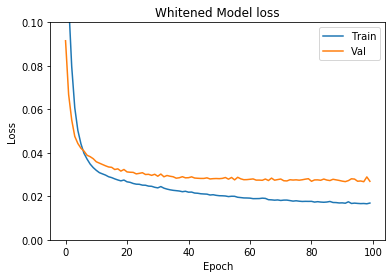

In [248]:
#Adapted from: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

plt.plot(boston_model_white.history['loss'])
plt.plot(boston_model_white.history['val_loss'])
plt.title('Whitened Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Accuracy of the whitened model

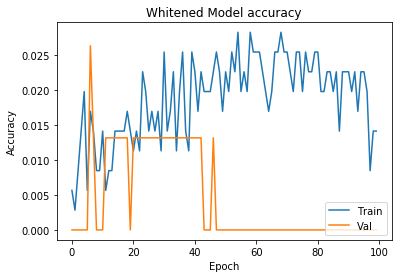

In [249]:
plt.plot(boston_model_white.history['accuracy'])
plt.plot(boston_model_white.history['val_accuracy'])
plt.title('Whitened Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()